In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath('../src'))
from fact_classification import *

ClaimBuster Dataset

Project page: https://idir.uta.edu/claimbuster/


The ClaimBuster dataset consists of six files as follows:
groundtruth.csv, (22,501 sentences)
crowdsourced.csv, (1032 sentences)
all_sentences.csv, (32,072 sentences)
2xNCS.json, (8292 sentences)
2.5xNCS.json, (9674 sentences)
3xNCS.json, (11,056 sentences)
Also, all 33 presidential debate transcript files are provided as additional files in the folder “debate_transcripts”.


The files groundtruth.csv, crowdsourced.csv, and all_sentences.csv are for the paper: A Benchmark Dataset of Check-worthy Factual Claims

Both groundtruth.csv and crowdsourced.csv files contain the following attributes.
- Sentence_id: A unique numerical identifier to identify sentences in the dataset.
- Text: A sentence spoken by a debate participant. 
- Speaker: Name of the person who verbalized the Text.
- Speaker_title: Speaker’s job at the time of the debate.
- Speaker_party: Political affiliation of the Speaker.
- File_id: Debate transcript name.
- Length: Number of words in the Text.  
- Line_number: A numerical identifier to to indicate the order of the Text in the debate transcript.
- Sentiment: Sentiment score of the Text. The score ranges from -1 (most negative sentiment) to 1 (most positive sentiment). 
- Verdict: Assigned class label (1 when the sentence is CFS,0 when the sentence is UFS, and -1 when sentence is NFS).
CFS = Check-worthy Factual Sentence
NFS = Non-Factual Sentence
UFS = Unimportant Factual Sentence

all_sentences.csv file contains all presidential debate sentences. It has all the features shown above except for ``Verdict''. It also includes the following attribute:
- Speaker_role: It depicts the role of the Speaker in the debate as a participant.

In [3]:
df, df_crowdsourced, df_ground_truth = data_loading()

In [4]:
df.head()

,Sentence_id,Text,Speaker,Speaker_title,Speaker_party,File_id,Length,Line_number,Sentiment,Verdict
0,16,I think we've seen a deterioration of values.,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,8,16,0.000000,-1
1,17,I think for a while as a nation we condoned th...,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,16,17,-0.456018,-1
2,18,"For a while, as I recall, it even seems to me ...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,29,18,-0.805547,-1
3,19,"So we've seen a deterioration in values, and o...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,35,19,0.698942,-1
4,20,"We got away, we got into this feeling that val...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,15,20,0.000000,-1


In [5]:
data_qc(df)

The dataset contains  0 duplicated values
The dataset contains  3  nan values
The nan values are in the  Sentiment  column


Need to do something with the missing values, we could drop (because they are all in the dominant class) but I'm giving us the option of doing an average (in the class) to fill the nans

In [6]:
df['Sentiment'] = df.Sentiment.fillna(df.Sentiment[df.Verdict == -1].mean())

In [7]:
df.Speaker.value_counts()

George W. Bush      2693
Barack Obama        2231
George Bush         1637
Donald Trump        1637
Mitt Romney         1476
Bill Clinton        1468
John Kerry          1366
John McCain         1165
Hillary Clinton     1108
Al Gore             1078
Bob Dole            1052
Jimmy Carter        1040
Ronald Reagan        957
Ross Perot           910
John F. Kennedy      868
Richard M. Nixon     817
Michael Dukakis      668
Gerald R. Ford       619
Walter Mondale       597
John Anderson        146
Name: Speaker, dtype: int64

I thought we had George Bush twice, but apparently it's Jr and Senior 😅 Good to check the categories just to make sure that there are no duplicates caused by typoes or something else, the dataset looks really good. From my not so good understanding of US presidents I also believe there seems to be more sentences from the later presidents. Again are we sure that we should keep our test and train split as suggested in the task description?

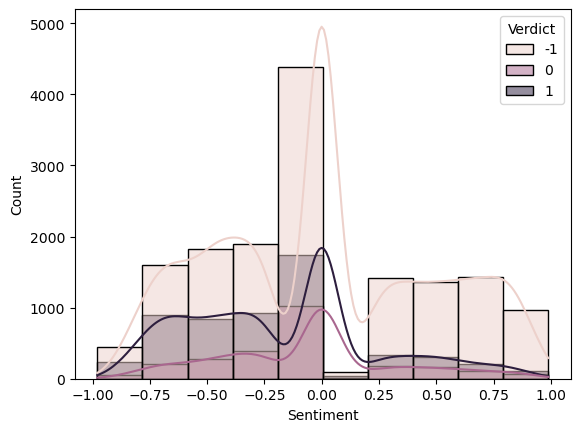

In [8]:
sns.histplot(data=df, x='Sentiment', hue='Verdict', stat='count',kde=True, bins = 10)
plt.show()

There is a strange gap in the sentiment distribution, maybe it is mentioned in the paper about the dataset?

In [9]:
df.Verdict.value_counts()

-1    15416
 1     5651
 0     2466
Name: Verdict, dtype: int64

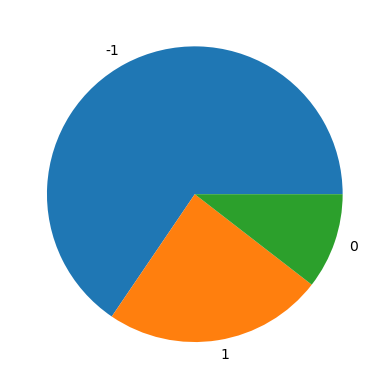

In [10]:
s = df['Verdict'].value_counts()
plt.pie(s,labels = s.index)
plt.show()

We have an uneven distribution of the verdicts for our dataset. The check-worthy sentences are under-represented. Maybe we could consider sampling? Also I suppose that classifying something as Check-worthy when it is not is not as bad as classifying something as not check worthy when it is, might be good to err on the side of check-worthy? Could we in the model penalise missing check-worthy more?

## Correlation

In [11]:
df = label_to_int(df)

After converting several of the other columns to int the strongest correlation is still seen for Length and Sentiment. Although none of them are very strong, so we should look for other features!

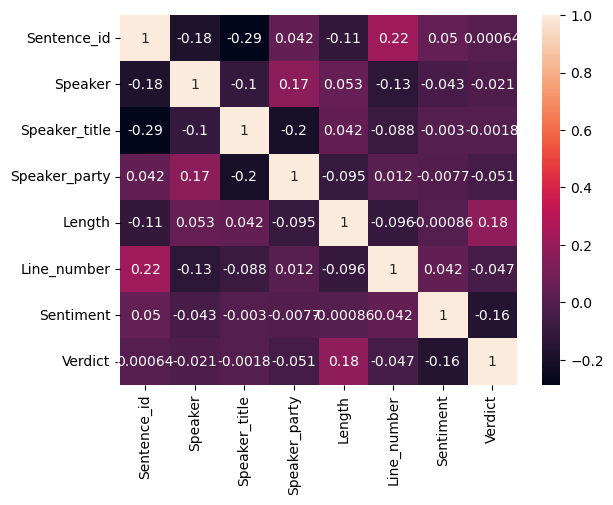

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

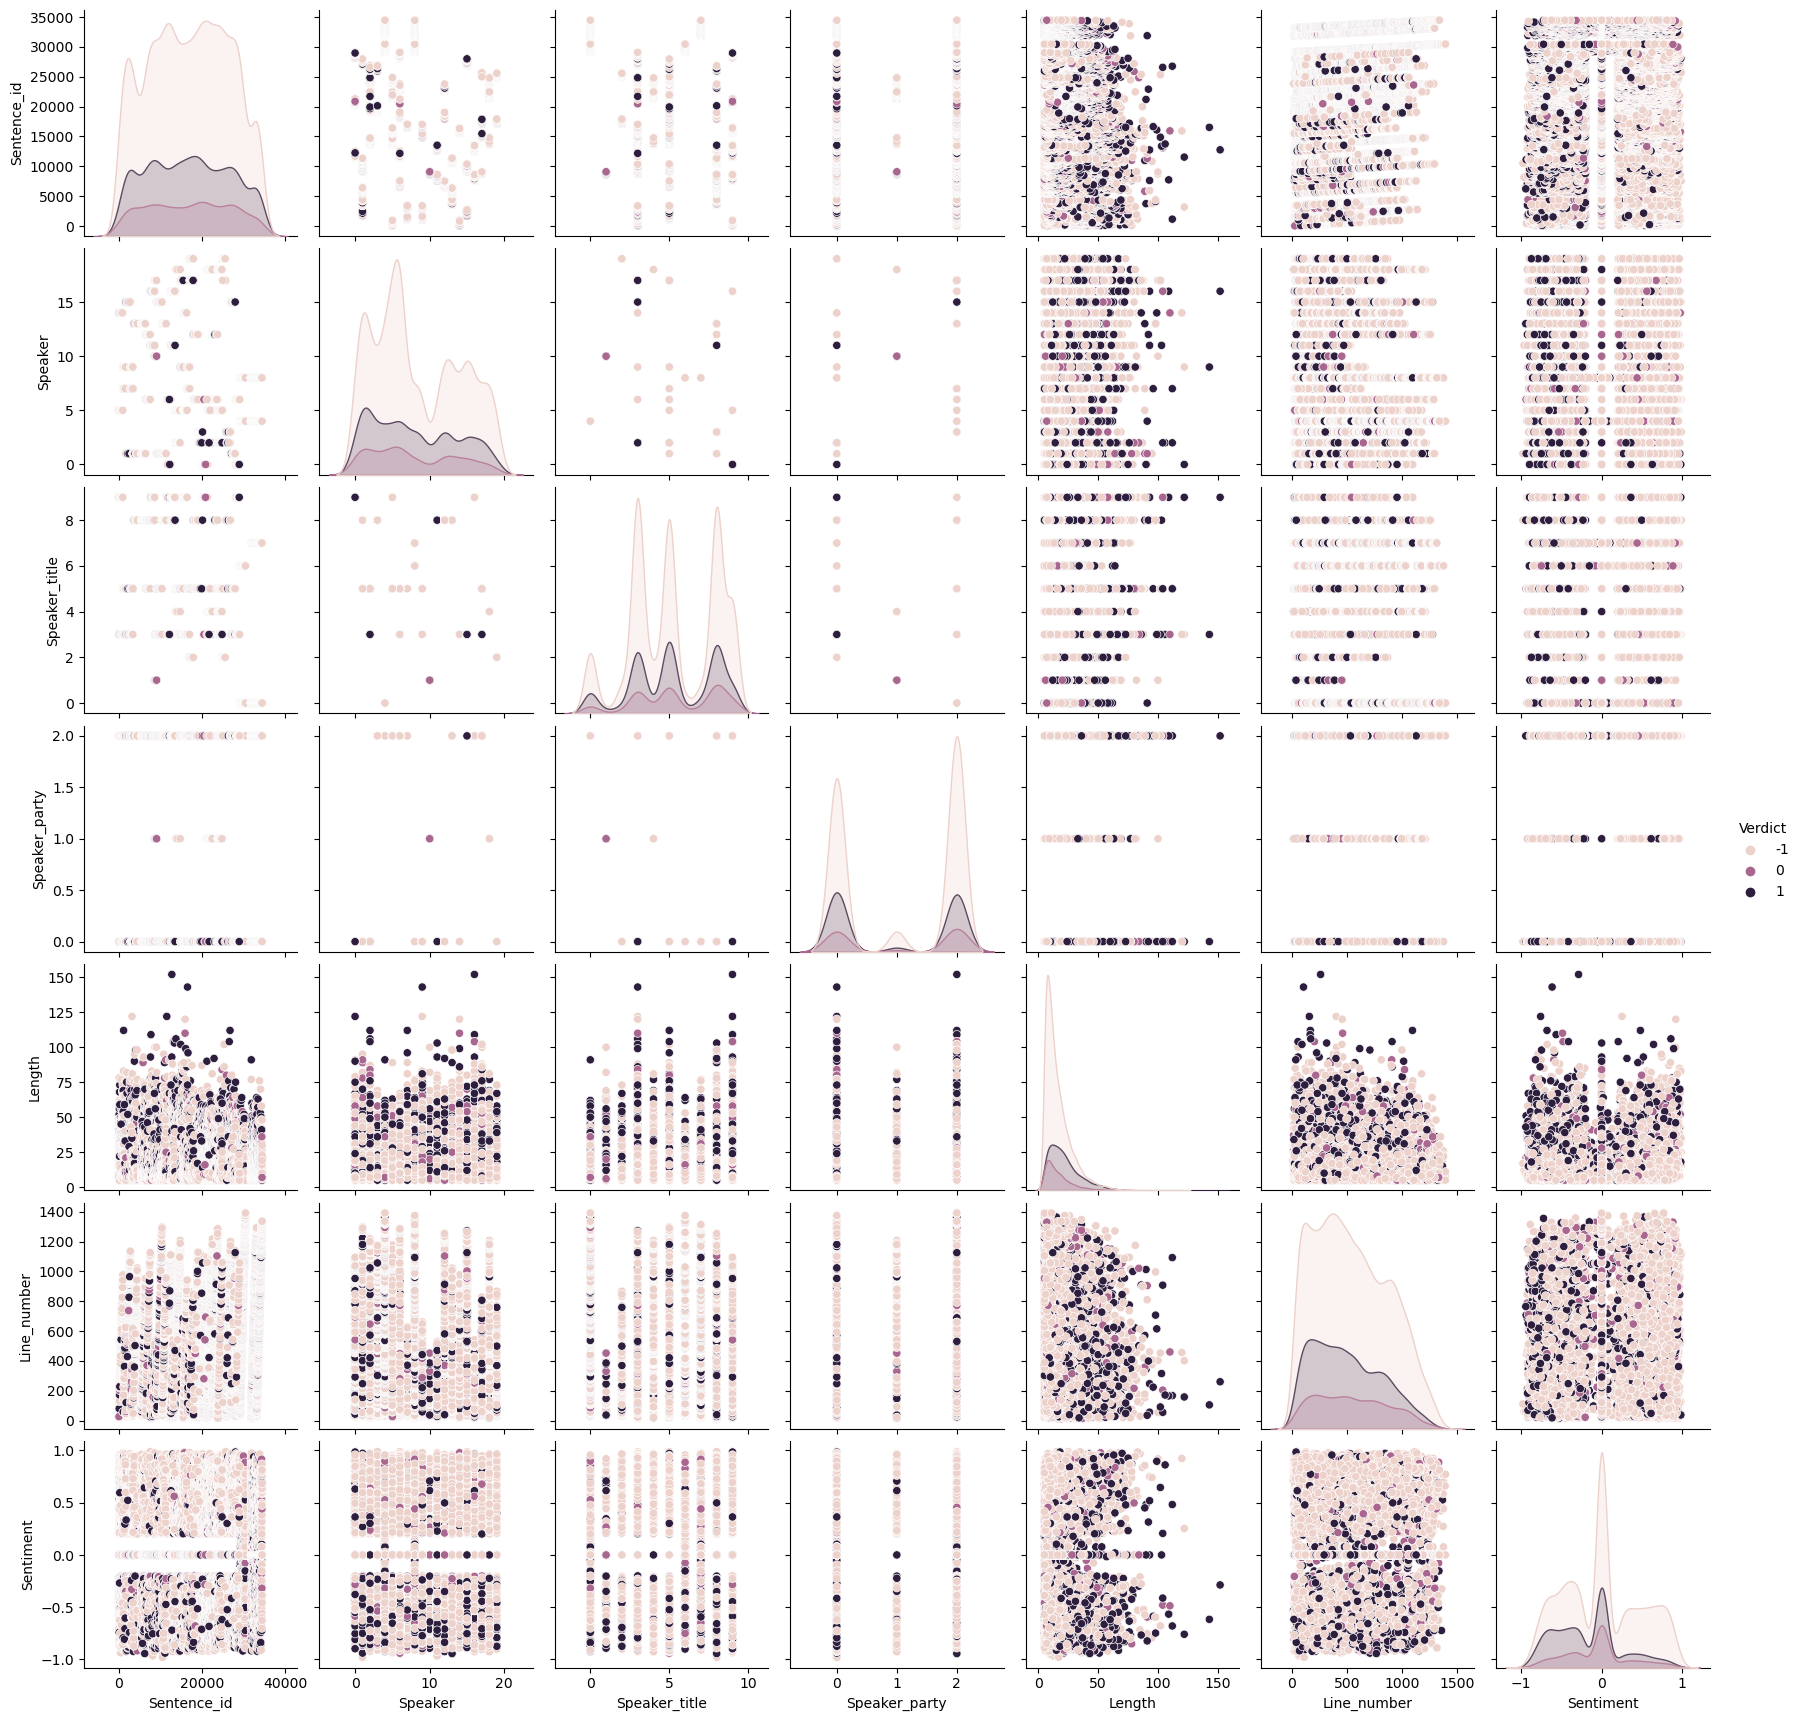

In [13]:
sns.pairplot(df, hue="Verdict")
plt.show()